# Data Structures and Processing

## Final Exam (Practice)

### Load Libraries

In [11]:
# Here is a list of some libraries to load. Add more when needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v3 as iio
import datetime as dtime

## Multiple Choice Questions

(These questions in the final exam might be presented outside of the Jupyter Notebook).

1. If `x=True`, `y=False`, then the value of `x and not y` is:

    1. `True` ----------
    2. `False`
    3. Raises a `ValueError`
    4. `None`
    
2. Is it true that the Python's builtin data type `str` is mutable?

    1. `True`
    2. `False` -----------

Explanation:
No, it is not true that Python's built-in str type is mutable. In Python, str objects are immutable. This means once a string object is created, its contents cannot be changed.

Mutability refers to the ability of an object to be modified after it has been created. If an object is mutable, you can change its content, state, or data after its creation without creating a new object. Conversely, if an object is immutable, any modification to its content results in the creation of a new object.

-----> lists are mutable 
-----> dictionaries are mutable 
-----> sets are mutable 

3. The answer to `(1+2 j)+ (3.5-j)` is

    1. 4.5 + j -----------
    2. 4+j
    3. `SyntaxError`
    4. `ValueError`
    
4. In a relational Algebra, while taking inner join of two tables, we must have the same number of fields in both tables.

    1. `True`
    2. `False` -------------
    
Explanation:
The requirement for an inner join in relational algebra is not about having the same number of fields in the two tables. It is about having a valid join condition. The inner join operation then produces a result set that combines columns from both tables for the rows that satisfy the join condition.

(must also have an key field) 
 for an inner join (or any join operation) in relational algebra, the tables involved must have at least one pair of columns (often referred to as key fields) that can be used for the join condition. These columns are typically used to match rows between the tables.


5. Given a data frame, the returned data structure is one of the following when the data frame is sliced along a single column.

    1. Numpy array
    2. pandas series -------------------
    3. Python's built in list.
    4. pandas `DataFrame`

6. While handling time series in Python, we leave the time-date entries as a string.

    1. `True`
    2. `False` ------------------------

Explanation:

When working with time series data in Python, it is best practice to convert time-date entries to a datetime format rather than leaving them as strings. Using datetime objects allows for more efficient and accurate time-based operations such as indexing, slicing, resampling, and performing time-aware calculations.
    
7. In pandas, date and time should not be used as an index for pandas Series or pandas `DataFrame`.

    1. `True`
    2. `False` --------------------------

Explanation:

Using date and time as an index for pandas Series or DataFrame is a common and highly recommended practice, especially when working with time series data. This practice allows you to leverage pandas' powerful time-based indexing and resampling capabilities.

    
8. While image processing and writing an image to a disk, we can also use Python's builtin function for writing data to a file on a disk.

    1. `True` ----------------------------
    2. `False`

9. When a color image is read into Python using the library `imageio`, then `matplotlib`'s data type is used for correct handling of images.

    1. `True` ------------------------------
    2. `False`

Explanation:

When reading a color image into Python using the imageio library, the resulting image is typically represented as a NumPy array. NumPy arrays are efficient data structures for numerical computations and are widely used in scientific computing, including image processing.

When displaying images using matplotlib, it's common practice to use matplotlib's data types for correct handling and visualization of images. matplotlib provides functions like imshow() to display images directly from NumPy arrays.


10. Is it true that in pandas, many of the functions do not modify the pandas `Series` or `DataFrame`, and that in order to make changes instead, these functions or methods provide an optional named argument `inplace`, which can be set to `True`.

    1. `True` ------------------------------
    2. `False`

Yes, that's correct! In pandas, many functions and methods do not modify the original DataFrame or Series by default. Instead, they return a new modified DataFrame or Series, leaving the original object unchanged. However, to perform modifications in place, these functions or methods often provide an optional named argument called inplace, which can be set to True.

## Problem 1

Write down a function `matching_lines_to_list` that takes two argument: `filename`, and `word`. The function `matching_lines_to_dict` returns a list of dictionaries of all the lines containing `word` in them.  Each of the dictionaries have: a key `"number"` with an integer value containing the line number of the line in the given file; a key `"freq"` which counts the number of times `word` appears in the line; and `"text"` with the value the actual text contained in that line.

Let us declare the second argument `word` to be optional, so that if `word` is not provided, the returned list should contain dictionaries, as described above, of all lines in the file.  In this case, `"freq"` has value 0.

In [3]:
def matching_lines_to_list(filename,word):
    result = []
    freq = 0 #initial 

    with open(filename,"r") as f:
        for line_number, line in enumerate(f, start=1):
            if word in line:
                freq = line.count(word)
                line_info = { 
                    "number" : line_number,
                    "freq" : freq,
                    "text" : line.strip()
                }
                result.append(line_info)
    return result
 

## Problem 2

Let $A$ be a square matrix.  The expression $P_n(t) = t^2A^2 + (1+t+\frac{t^2}{2}+\frac{t^3}{3}+\cdots+\frac{t^n}{n})I$ is a polynomial of the given matrix $A$ that also depends on time $t$, where $I$ is the identity matrix of the same size as the given matrix.  Let $X$ be a vector of size $m$, we are interested in computing $P_n(0.5)X$.

Your task is to write down a function `polynomial_at_time` which takes the following arguments:

1.  `A`, which is a `numpy` array corresponding to the square matrix
    $A$ of the linear equation above
2.  `t`, which is the value of the time $t$
3.  `X`, which is a `numpy` array of shape `(m,1)` and it corresponds
    to the vector of length $m$ in above linear equation
4. `n`, which is a parameter in the polynomial above, which can be any positive integer.

The function `polynomial_at_time` must return a `numpy` one dimensional array.

Use your function to test for different values of `m` and `t` for the
matrix $A$ and a vector $X$ below.

\begin{equation}
\nonumber
A= \begin{bmatrix} 0.2 & 0.8 \\ 0.8 & 0.2 \end{bmatrix},\qquad X_0 = \begin{bmatrix} 0.707 \\ -0.707 \end{bmatrix}
\end{equation}

**HINTS:**

1.  To compute power of a matrix, use the `np.linalg.matrix_power`. See
    builtin help for this function in Python.
2.  Testing your function is not part of grades.

In [4]:
def polynomial_at_time(A,t,X,n):
    sum = 1
    sqr_matrix = np.linalg.matrix_power(A,2)
    sqr_part = t**2 * sqr_matrix

    for k in range(1,n):
        sum = sum + (t**k/k)

    P_n_t = sqr_part + (sum * np.eye(A.shape[0]))

    result = np.dot(P_n_t,X)

    return result


# A.shape[0]

# A.shape returns a tuple representing the dimensions of the numpy array A. For a 2D array (matrix), it returns (number_of_rows, number_of_columns).
# A.shape[0] specifically extracts the number of rows in matrix A.

# np.dot()

# np.dot(a, b) is a numpy function that performs dot product or matrix multiplication between arrays a and b.
    

## Problem 3

Let us say that there are three tables in a relational database named: `employees`, `works_in` and `department`.  The table `employees` has the fields: `id`, `first_name`, `last_name`, `date_of_birth`.  The table `departments` have two fields `department_id` and `department_name`. The table `works_in` has fiels `employee_id` and `department_id`, which provides the information about the department where an employee works in.  Write down an SQL query using these tables, and obtain a table that returns a table with the fields: ? `first_name`, `last_name`, `department_name`.  The returned table shows the exact name of the employee in which he/she works in.

In [ ]:

CREATE TABLE employees(
    id TEXT PRIMARY KEY,
    first_name TEXT, 
    last_name TEXT,
    date_of_birth DATE
);

CREATE TABLE works_in(
    employee_id TEXT,
    department_id TEXT
    FOREIGN KEY (employee_id) REFERENCES employees(id)
    FOREIGN KEY (department_id) REFERENCES departments(department_id)
);

CREATE TABLE departments(
    department_id TEXT PRIMARY KEY,
    department_name TEXT
);

SELECT first_name, last_name, department_name
    FROM employees, works_in, departments
        

## Problem 4


Consider the `TSV` file, named `"imdb_ratings.tsv"` attached to this notebook. An important part of this task is to keep in mind is that the data in the `TSV` file has two columns: `stars_ratings`, which is a float, and `actors`, which is a string of actors (comma separated) acted in the movie. It is not important how many and what other columns are present. Write down a function `actors_total_movies` that takes the following two arguments:

1.  `filename`, which is the the file name for the `TSV` file to be read.

2.  `actor`, which is the name of the actor for filtering.

The function `actors_total_movies` returns the total movies in which `actor` is present and has a rating listed in the data file.

In [19]:
import ast

def actors_total_movies(filename, actor):
    # Read the TSV file with tab delimiter
    df = pd.read_csv(filename, sep='\t')
    
    # Ensure the 'actors' column exists
    if 'actors' not in df.columns:
        raise ValueError("The input file must contain an 'actors' column")
    
    # Parse the 'actors' column from its JSON-like format to a Python list
    df['actors'] = df['actors'].apply(ast.literal_eval)
    
    # Filter the rows where the specified actor is present in the 'actors' column
    actor_in_movies = df['actors'].apply(lambda actors_list: actor in actors_list)
    
    # Count the number of movies featuring the specified actor
    total_movies = actor_in_movies.sum()
    
    return total_movies

# Example usage:
filename = "imdb_ratings.tsv"
actor = "Jake Gyllenhaal"
print(actors_total_movies(filename, actor))


8


## Problem 5

Let us import `json` file in `df`, as a first step.  The variable `df1` has `MultiIndex` in it.  Let us define two `DataFrame` named `df1a` and `df1b`.  Your task is to define a variable `df2`, which contains a merge of `df1a` and `df1b` on the column `"title"`.  Make sure that the returned table has the `MultiIndex` inherited and it is not stripped away.

In [20]:
# Your solution goes here.
df = pd.read_json("entertain.json")

df1 = df.set_index(["rating", "stars"])

df1a = df1[["title", "duration"]]
df2b = df1[["genre", "title"]]

df2 = pd.merge(df1a,df2b, on='title')
print(df2)

                      title  duration      genre
0                 Quiz Show       133        NaN
1                    Batman       126     Action
2   The Wolf of Wall Street       180  Biography
3                      Jaws       124      Drama
4             Belle de Jour       101      Drama
5        As Good as It Gets       139     Comedy
6               Toy Story 3       103  Animation
7  Manhattan Murder Mystery       104     Comedy


## Problem 6

Consider the `IBM.csv` file containing the IBM stocks.  Consider a smoothing factor `alpha=0.01`, and plot the `ewm` average for the column `"Open"`, and the actual values in that column.

Your task is to down-sample the column `"Close"` to monthly periods using average values. Finally, plot the returned series.

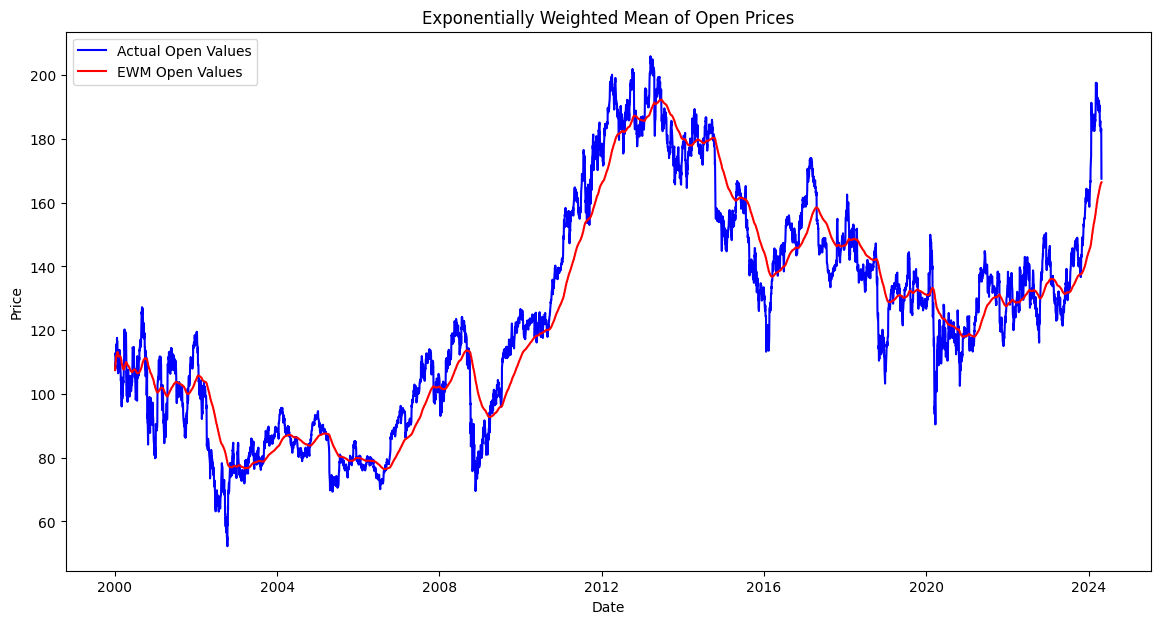

/tmp/ipykernel_59674/316961632.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()


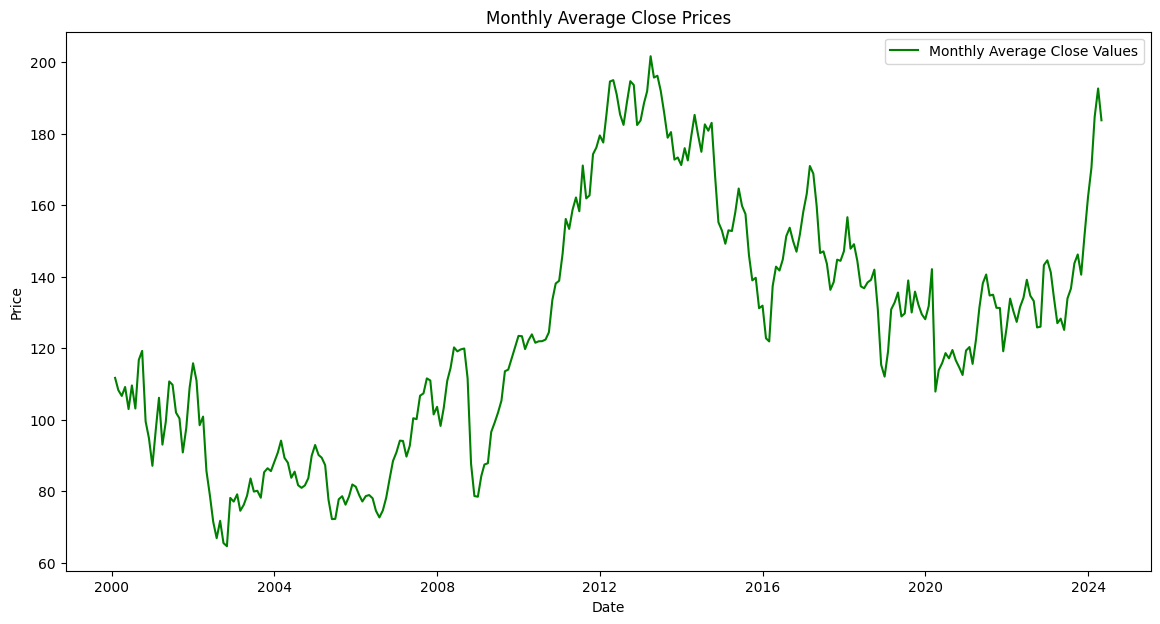

In [23]:
# Step 1: Read the CSV file
df = pd.read_csv("IBM.csv", parse_dates=["Date"], index_col="Date")

# Step 2: Calculate and plot the EWM for the "Open" column
alpha = 0.01
df['EWM_Open'] = df['Open'].ewm(alpha=alpha).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Open'], label='Actual Open Values', color='blue')
plt.plot(df.index, df['EWM_Open'], label='EWM Open Values', color='red')
plt.title('Exponentially Weighted Mean of Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 3: Down-sample the "Close" column to monthly periods using average values
df_monthly = df['Close'].resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(df_monthly.index, df_monthly, label='Monthly Average Close Values', color='green')
plt.title('Monthly Average Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Problem 7

Consider the image `sudoku.png` in the attachment to this notebook.

Write down a function `image_object_count` that takes a `file_in` as the only argument and returns the number of objects on it.

For help, please refer to the associated lecture material.

In [26]:
import skimage.io as iio
import skimage.color as ski_color
import skimage.filters as ski_filters
import skimage.measure as ski_measure

def image_object_count(file_in):
    # Read the input image
    image = iio.imread(file_in)

    # Convert the image to grayscale
    gray_shapes = ski_color.rgb2gray(image)

    # Blur the image to denoise
    blurred_shapes = ski_filters.gaussian(gray_shapes, sigma=1.0)

    # Define the threshold using Otsu's method
    t = ski_filters.threshold_otsu(blurred_shapes)

    # Create a binary mask
    binary_mask = blurred_shapes < t

    # Label connected components in the binary mask and count them
    labeled_image, count = ski_measure.label(binary_mask, connectivity=1, return_num=True)

    print(f'Number of objects on the image: {count}')

# Example usage:
image_object_count("sudoku.png")


Number of objects on the image: 29
